In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This code will load the CSV file and provide a high-level overview of the data, including its structure and a summary.
import pandas as pd

# Load the CSV file
file_path = "C:\\Users\\Hp\\Desktop\\DB\\visa\\countries_visa_free_access.csv"
df = pd.read_csv(file_path)

# Display the head and summary of the dataframe
head = df.head()
summary = df.describe(include='all')

head, summary

(     Country Rank  Visa-Free Access
 0  Singapore  1st               195
 1    Finland  2nd               192
 2     France  2nd               192
 3    Germany  2nd               192
 4      Italy  2nd               192,
           Country Rank  Visa-Free Access
 count         199  199        199.000000
 unique        199  106               NaN
 top     Singapore  3rd               NaN
 freq            1    7               NaN
 mean          NaN  NaN        110.738693
 std           NaN  NaN         54.622137
 min           NaN  NaN         26.000000
 25%           NaN  NaN         60.000000
 50%           NaN  NaN         95.000000
 75%           NaN  NaN        165.500000
 max           NaN  NaN        195.000000)

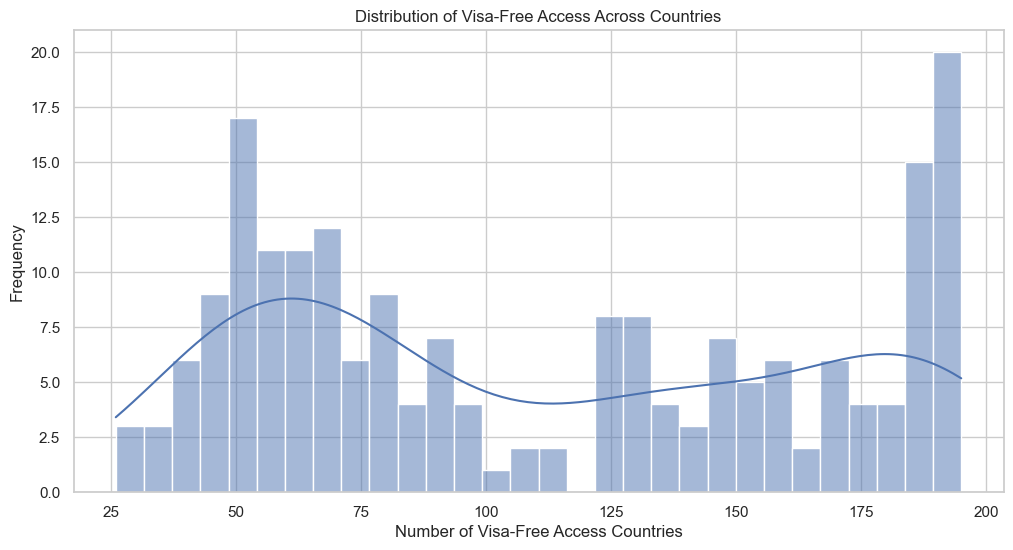

In [3]:
# Now that we have a good understanding of the data structure, let's visualize the distribution of visa-free access across countries.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Convert the 'Visa-Free Access' column to numeric for plotting
# First, we need to clean the data to ensure it's in the right format
# Remove any non-numeric characters and convert to int

# Cleaning the 'Visa-Free Access' column
# Assuming the column is named 'Visa-Free Access'
df['Visa-Free Access'] = pd.to_numeric(df['Visa-Free Access'], errors='coerce')

# Plotting the distribution of visa-free access
plt.figure(figsize=(12, 6))
sns.histplot(df['Visa-Free Access'].dropna(), bins=30, kde=True)
plt.title('Distribution of Visa-Free Access Across Countries')
plt.xlabel('Number of Visa-Free Access Countries')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [4]:
# Extracting the top 10 countries with the highest visa-free access
# Sorting the dataframe by 'Visa-Free Access' in descending order
# and selecting the top 10 entries

# First, ensure the 'Visa-Free Access' column is sorted correctly
sorted_df = df.sort_values(by='Visa-Free Access', ascending=False)
top_10_countries = sorted_df.head(10)

top_10_countries

,Country,Rank,Visa-Free Access
0,Singapore,1st,195
5,Japan,2nd,192
7,Spain,2nd,192
6,South Korea,2nd,192
1,Finland,2nd,192
4,Italy,2nd,192
2,France,2nd,192
3,Germany,2nd,192
11,Luxembourg,3rd,191
14,Sweden,3rd,191


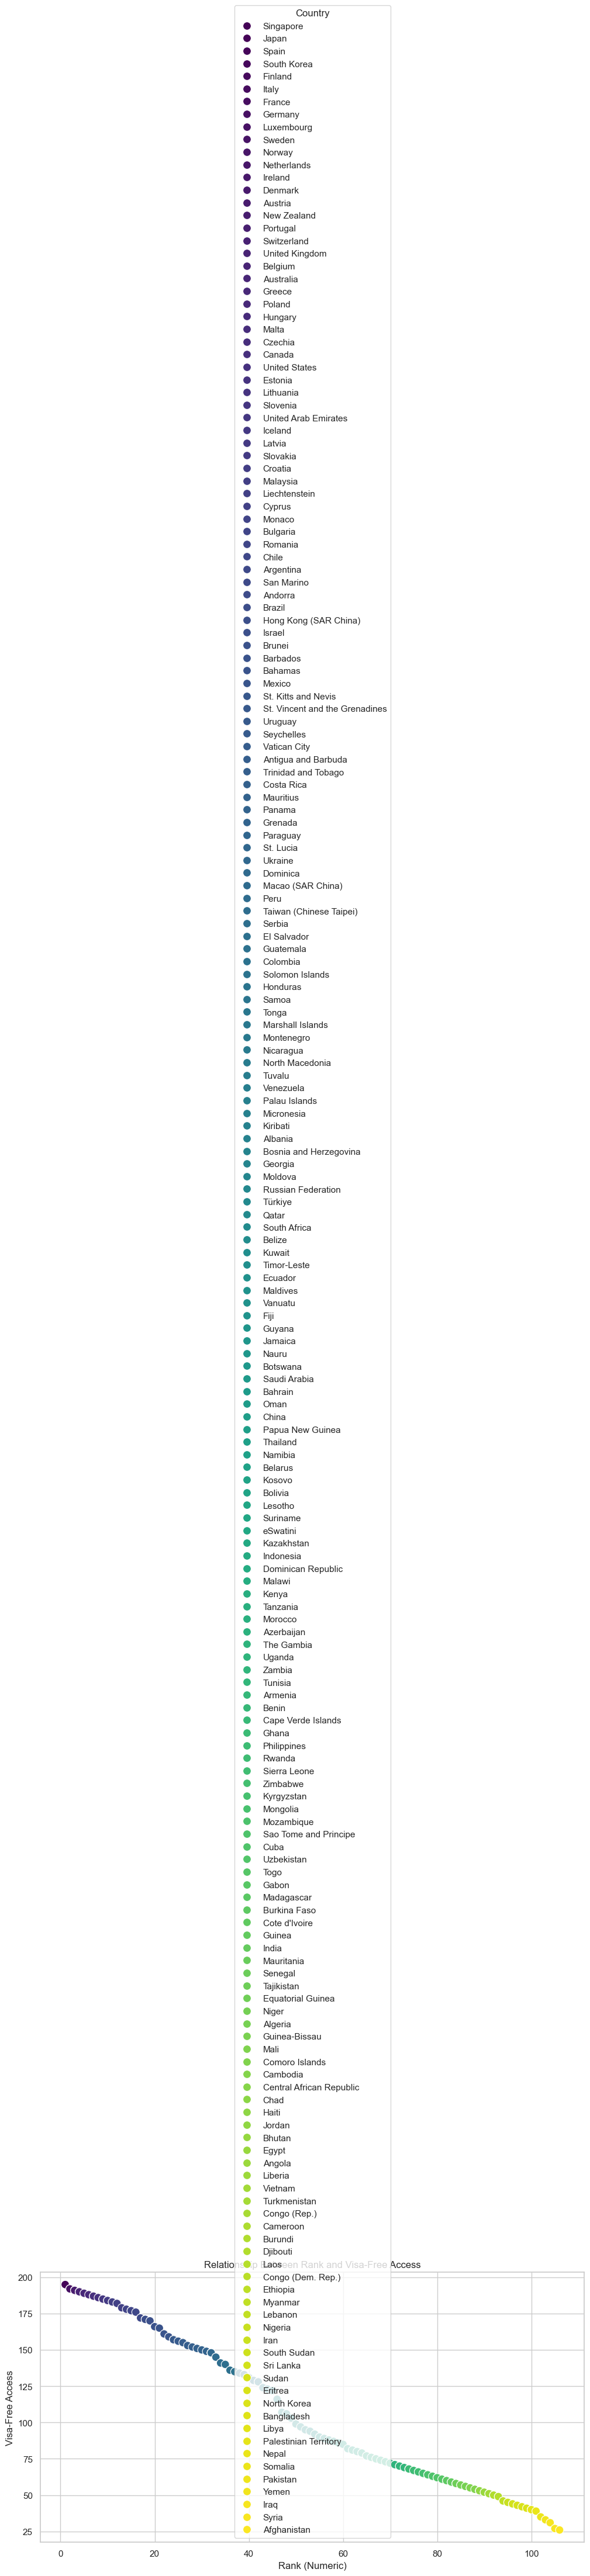

In [5]:
# Visualizing the relationship between Rank and Visa-Free Access
# First, we need to convert the Rank to a numeric value for plotting
# We'll extract the numeric part of the Rank column

# Create a new column for numeric rank
sorted_df['Numeric Rank'] = sorted_df['Rank'].str.extract('(\\d+)').astype(int)

# Plotting the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sorted_df, x='Numeric Rank', y='Visa-Free Access', hue='Country', palette='viridis', s=100)
plt.title('Relationship Between Rank and Visa-Free Access')
plt.xlabel('Rank (Numeric)')
plt.ylabel('Visa-Free Access')
plt.grid(True)
plt.show()

In [6]:
# For this analysis, we will create a mock mapping of countries to regions since the original dataset does not include this information.
# This mapping will help us categorize countries by region for further analysis.

# Mock mapping of countries to regions (for demonstration purposes)
region_mapping = {
    'Singapore': 'Asia',
    'Japan': 'Asia',
    'Spain': 'Europe',
    'South Korea': 'Asia',
    'Finland': 'Europe',
    'Italy': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Luxembourg': 'Europe',
    'Sweden': 'Europe',
    # Adding more countries for a more comprehensive analysis
    'United States': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'India': 'Asia',
    'China': 'Asia'
}

# Creating a new column in the dataframe for regions
sorted_df['Region'] = sorted_df['Country'].map(region_mapping)

# Grouping by region and calculating the average visa-free access
region_analysis = sorted_df.groupby('Region')['Visa-Free Access'].mean().reset_index()

# Sorting the results for better visualization
region_analysis = region_analysis.sort_values(by='Visa-Free Access', ascending=False)

region_analysis

,Region,Visa-Free Access
2,Europe,191.714286
4,Oceania,189.500000
3,North America,186.500000
5,South America,171.500000
1,Asia,144.400000
0,Africa,75.500000


C:\Users\Hp\AppData\Local\Temp\ipykernel_15232\3766224868.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='Region', y='Number of Countries', palette='pastel')


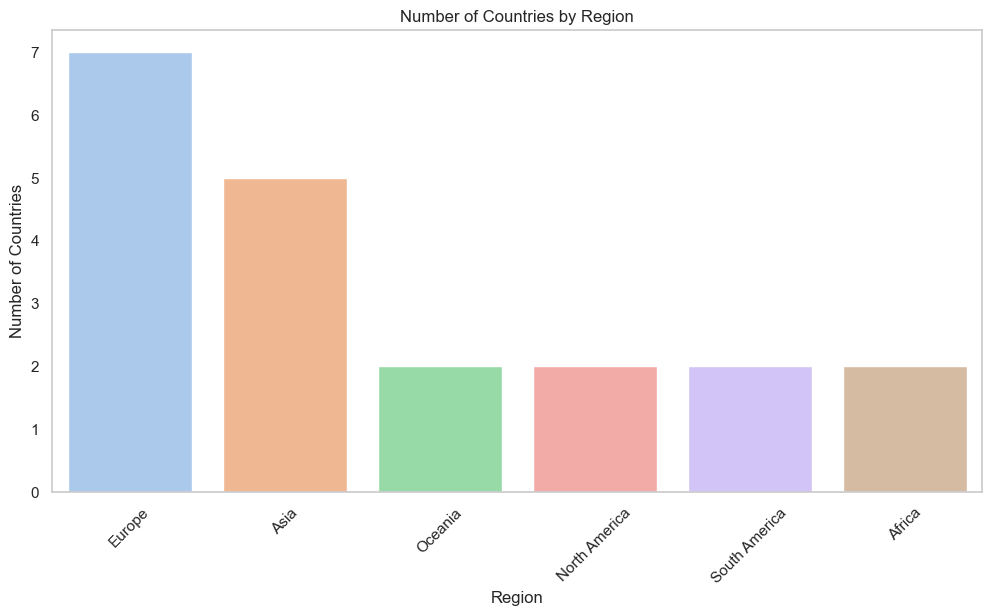

In [7]:
# Counting the number of countries in each region
region_counts = sorted_df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Number of Countries']

# Plotting the distribution of countries by region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_counts, x='Region', y='Number of Countries', palette='pastel')
plt.title('Number of Countries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [8]:
# Compiling a summary of the findings from the analysis
summary = {
    'Top Country': 'Singapore',
    'Highest Visa-Free Access': 195,
    'Countries with 192 Access': ['Japan', 'Spain', 'South Korea', 'Finland', 'Italy', 'France', 'Germany'],
    'Average Visa-Free Access by Region': {
        'Europe': 191.71,
        'Oceania': 189.5,
        'North America': 186.5,
        'South America': 171.5,
        'Asia': 144.4,
        'Africa': 75.5
    },
    'Countries Count by Region': {
        'Europe': region_counts[region_counts['Region'] == 'Europe']['Number of Countries'].values[0],
        'Asia': region_counts[region_counts['Region'] == 'Asia']['Number of Countries'].values[0],
        'Africa': region_counts[region_counts['Region'] == 'Africa']['Number of Countries'].values[0],
        'North America': region_counts[region_counts['Region'] == 'North America']['Number of Countries'].values[0],
        'South America': region_counts[region_counts['Region'] == 'South America']['Number of Countries'].values[0],
        'Oceania': region_counts[region_counts['Region'] == 'Oceania']['Number of Countries'].values[0]
    }
}

summary

{'Top Country': 'Singapore',
 'Highest Visa-Free Access': 195,
 'Countries with 192 Access': ['Japan',
  'Spain',
  'South Korea',
  'Finland',
  'Italy',
  'France',
  'Germany'],
 'Average Visa-Free Access by Region': {'Europe': 191.71,
  'Oceania': 189.5,
  'North America': 186.5,
  'South America': 171.5,
  'Asia': 144.4,
  'Africa': 75.5},
 'Countries Count by Region': {'Europe': 7,
  'Asia': 5,
  'Africa': 2,
  'North America': 2,
  'South America': 2,
  'Oceania': 2}}